# K-means Clustering 

## Clustering basics

Cluster analysis or clustering is the task of grouping a set of objects $\{\mathrm{x}_i\}, i=1. 2..., n$ in such a way that objects in the same group (called a cluster) are more similar  to each other than to those in other groups (clusters).

![Classfication.](https://raw.githubusercontent.com/binbenliu/Teaching/main/DataMining/clustering.png)

## K-means algorithm 

Given a set of observations $(\mathrm x_1, \mathrm x_2, ..., \mathrm x_n)$, where each observation is a d-dimensional real vector, k-means clustering aims to partition the $n$ observations into $k < n$ clusters  ${C_1, C_2, ..., C_k}$ so as to minimize the within-cluster sum of squared errors (SSE). Formally, the objective is to find:

\begin{align}
\displaystyle SSE = \sum _{i=1}^{k}\sum _{\mathbf {x} \in C_{i}}\left\|\mathbf {x} -{\boldsymbol {\mu }}_{i}\right\|^{2}
\end{align}

* $k$ is number of clusters
* $\mathbf {x}$ is a data point in cluster $C_{i}$
* $\mu_{i}$ is the centroid (mean) for cluster $C_{i}$
* SSE improves in each iteration of K-means until it reaches a minima.

The k-means algorithm works as follows:


1. Select $k$ points as the initial centroids 
2. repeat
3. > Form $k$ clusters by assigning each point to the closest centroid
4. > Compute the new centroid of each cluster (distance minimizing) 
5. until The centroids do not change

## K-means in scikit-learn

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

class sklearn.cluster.KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='auto')

## Demo

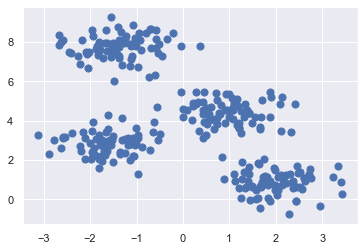

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

# generate dataset
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [3]:
y_true

array([1, 3, 0, 3, 1, 1, 2, 0, 3, 3, 2, 3, 0, 3, 1, 0, 0, 1, 2, 2, 1, 1,
       0, 2, 2, 0, 1, 0, 2, 0, 3, 3, 0, 3, 3, 3, 3, 3, 2, 1, 0, 2, 0, 0,
       2, 2, 3, 2, 3, 1, 2, 1, 3, 1, 1, 2, 3, 2, 3, 1, 3, 0, 3, 2, 2, 2,
       3, 1, 3, 2, 0, 2, 3, 2, 2, 3, 2, 0, 1, 3, 1, 0, 1, 1, 3, 0, 1, 0,
       3, 3, 0, 1, 3, 2, 2, 0, 1, 1, 0, 2, 3, 1, 3, 1, 0, 1, 1, 0, 3, 0,
       2, 2, 1, 3, 1, 0, 3, 1, 1, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 3, 2,
       2, 1, 3, 2, 2, 3, 0, 3, 3, 2, 0, 2, 0, 2, 3, 0, 3, 3, 3, 0, 3, 0,
       1, 2, 3, 2, 1, 0, 3, 0, 0, 1, 0, 2, 2, 0, 1, 0, 0, 3, 1, 0, 2, 3,
       1, 1, 0, 2, 1, 0, 2, 2, 0, 0, 0, 0, 1, 3, 0, 2, 0, 0, 2, 2, 2, 0,
       2, 3, 0, 2, 1, 2, 0, 3, 2, 3, 0, 3, 0, 2, 0, 0, 3, 2, 2, 1, 1, 0,
       3, 1, 1, 2, 1, 2, 0, 3, 3, 0, 0, 3, 0, 1, 2, 0, 1, 2, 3, 2, 1, 0,
       1, 3, 3, 3, 3, 2, 2, 3, 0, 2, 1, 0, 2, 2, 2, 1, 1, 3, 0, 0, 2, 1,
       3, 2, 0, 3, 0, 1, 1, 2, 2, 0, 1, 1, 1, 0, 3, 3, 1, 1, 0, 1, 1, 1,
       3, 2, 3, 0, 1, 1, 3, 3, 3, 1, 1, 0, 3, 2])

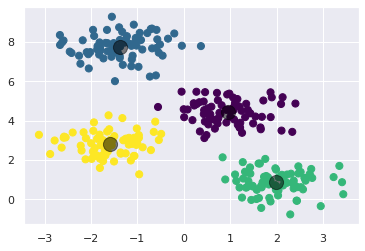

In [18]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, init='k-means++')
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [19]:
y_kmeans

array([2, 1, 0, 1, 2, 2, 3, 0, 1, 1, 3, 1, 0, 1, 2, 0, 0, 2, 3, 3, 2, 2,
       0, 3, 3, 0, 2, 0, 3, 0, 1, 1, 0, 1, 1, 1, 1, 1, 3, 2, 0, 3, 0, 0,
       3, 3, 1, 3, 1, 2, 3, 2, 1, 2, 2, 3, 1, 3, 1, 2, 1, 0, 1, 3, 3, 3,
       1, 2, 1, 3, 0, 3, 1, 3, 3, 1, 3, 0, 2, 1, 2, 0, 2, 2, 1, 0, 2, 0,
       1, 1, 0, 2, 1, 3, 3, 0, 2, 2, 0, 3, 1, 2, 1, 2, 0, 2, 2, 0, 1, 0,
       3, 3, 2, 1, 2, 0, 1, 2, 2, 0, 3, 2, 3, 2, 2, 2, 2, 3, 2, 3, 1, 3,
       3, 2, 1, 3, 3, 1, 0, 1, 1, 3, 0, 3, 0, 3, 1, 0, 1, 1, 1, 0, 1, 0,
       2, 3, 1, 3, 2, 0, 1, 0, 0, 2, 0, 3, 3, 0, 2, 0, 0, 1, 2, 0, 3, 1,
       2, 2, 0, 3, 2, 0, 3, 3, 0, 0, 0, 0, 2, 1, 0, 3, 0, 0, 3, 3, 3, 0,
       3, 1, 0, 3, 2, 3, 0, 1, 3, 1, 0, 1, 0, 3, 0, 0, 1, 3, 3, 2, 2, 0,
       1, 2, 2, 3, 2, 3, 0, 1, 1, 0, 0, 1, 0, 2, 3, 0, 2, 3, 1, 3, 2, 0,
       2, 1, 1, 1, 1, 3, 3, 1, 0, 3, 2, 0, 3, 3, 3, 2, 2, 1, 0, 0, 3, 2,
       1, 3, 0, 1, 0, 2, 2, 3, 3, 0, 2, 2, 2, 0, 1, 1, 2, 2, 0, 2, 2, 2,
       1, 3, 1, 0, 2, 2, 1, 1, 1, 2, 2, 0, 1, 3], d

## Impacts of k

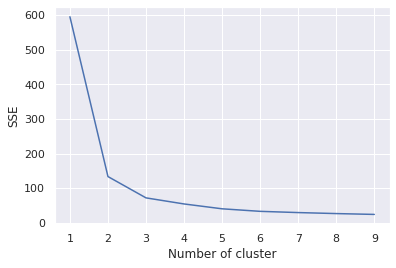

In [20]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris['feature_names'])
#print(X)
data = X[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']]

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
    data["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

## Impacts of initialization

Evaluation of KMeans with k-means++ init
Evaluation of KMeans with random init


Text(0.5, 1.0, 'Mean inertia for various k-means init across 5 runs')

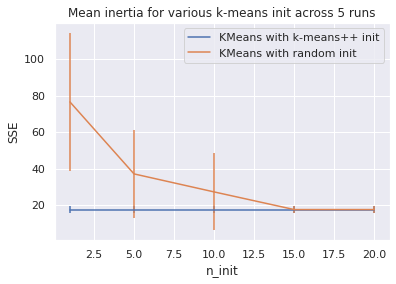

In [21]:
# Author: Olivier Grisel <olivier.grisel@ensta.org>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.utils import shuffle
from sklearn.utils import check_random_state
from sklearn.cluster import KMeans

random_state = np.random.RandomState(0)

# Number of run (with randomly generated dataset) for each strategy so as
# to be able to compute an estimate of the standard deviation
n_runs = 5

# k-means models can do several random inits so as to be able to trade
# CPU time for convergence robustness
n_init_range = np.array([1, 5, 10, 15, 20])

# Datasets generation parameters
n_samples_per_center = 100
grid_size = 3
scale = 0.1
n_clusters = grid_size ** 2


def make_data(random_state, n_samples_per_center, grid_size, scale):
    random_state = check_random_state(random_state)
    centers = np.array([[i, j] for i in range(grid_size) for j in range(grid_size)])
    n_clusters_true, n_features = centers.shape

    noise = random_state.normal(
        scale=scale, size=(n_samples_per_center, centers.shape[1])
    )

    X = np.concatenate([c + noise for c in centers])
    y = np.concatenate([[i] * n_samples_per_center for i in range(n_clusters_true)])
    return shuffle(X, y, random_state=random_state)


# Part 1: Quantitative evaluation of various init methods


plt.figure()
plots = []
legends = []

cases = [
    (KMeans, "k-means++", {}),
    (KMeans, "random", {}),
]

for factory, init, params in cases:
    print("Evaluation of %s with %s init" % (factory.__name__, init))
    inertia = np.empty((len(n_init_range), n_runs))

    for run_id in range(n_runs):
        X, y = make_data(run_id, n_samples_per_center, grid_size, scale)
        for i, n_init in enumerate(n_init_range):
            km = factory(
                n_clusters=n_clusters,
                init=init,
                random_state=run_id,
                n_init=n_init,
                **params,
            ).fit(X)
            inertia[i, run_id] = km.inertia_
    p = plt.errorbar(n_init_range, inertia.mean(axis=1), inertia.std(axis=1))
    plots.append(p[0])
    legends.append("%s with %s init" % (factory.__name__, init))

plt.xlabel("n_init")
plt.ylabel("SSE")
plt.legend(plots, legends)
plt.title("Mean inertia for various k-means init across %d runs" % n_runs)



## K-means application example

K-means can be used to group users at Amazon or Netflix 

In [22]:
import pandas as pd

ratings = [['john',5,5,2,1],['mary',4,5,3,2],['bob',4,4,4,3],['lisa',2,2,4,5],['lee',1,2,3,4],['harry',2,1,5,5]]
titles = ['user','Jaws','Star Wars','Exorcist','Omen']
movies = pd.DataFrame(ratings,columns=titles)
movies

,user,Jaws,Star Wars,Exorcist,Omen
0,john,5,5,2,1
1,mary,4,5,3,2
2,bob,4,4,4,3
3,lisa,2,2,4,5
4,lee,1,2,3,4
5,harry,2,1,5,5


In this example dataset, the first 3 users liked action movies (Jaws and Star Wars) while the last 3 users enjoyed horror movies (Exorcist and Omen). Our goal is to apply k-means clustering on the users to identify groups of users with similar movie preferences.

The example below shows how to apply k-means clustering (with k=2) on the movie ratings data. We must remove the "user" column first before applying the clustering algorithm. The cluster assignment for each user is displayed as a dataframe object.

In [23]:
from sklearn import cluster

data = movies.drop('user',axis=1)
k_means = cluster.KMeans(n_clusters=2, max_iter=50, random_state=1)
k_means.fit(data) 
labels = k_means.labels_
pd.DataFrame(labels, index=movies.user, columns=['Cluster ID'])

,Cluster ID
user,
john,1
mary,1
bob,1
lisa,0
lee,0
harry,0


The k-means clustering algorithm assigns the first three users to one cluster and the last three users to the second cluster. The results are consistent with our expectation. We can also display the centroid for each of the two clusters.

In [24]:
centroids = k_means.cluster_centers_
pd.DataFrame(centroids,columns=data.columns)

,Jaws,Star Wars,Exorcist,Omen
0,1.666667,1.666667,4.0,4.666667
1,4.333333,4.666667,3.0,2.000000


Observe that cluster 0 has higher ratings for the horror movies whereas cluster 1 has higher ratings for action movies. The cluster centroids can be applied to other users to determine their cluster assignments.

To determine the number of clusters in the data, we can apply k-means with varying number of clusters from 1 to 6 and compute their corresponding sum-of-squared errors (SSE) as shown in the example below. The "elbow" in the plot of SSE versus number of clusters can be used to estimate the number of clusters.

Text(0, 0.5, 'SSE')

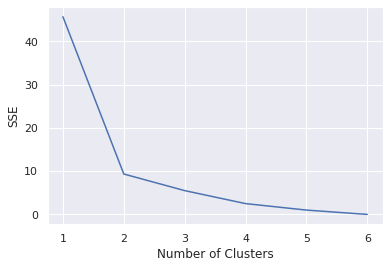

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

numClusters = [1,2,3,4,5,6]
SSE = []
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(data)
    SSE.append(k_means.inertia_)

plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')